PSF WITH SEIDEL ABERRATIONS--ZEMAX COEFFICIENTS


In [1]:
import numpy as np
import cv2
from numpy.fft import fft2,fftshift,ifft2,ifftshift 
from helper import seidel,circular,circ
import matplotlib.pyplot as plt

In [8]:
"""Image Plane"""
M = 128                         # Sample No
L = 10**-3                      # Image Plane side Length
du = L/M                        #Sample Interval
u = np.arange(-L/2,L/2,du)      # u-coordinates
v = u    # v - coordinates

"""Exit pupil plane"""
lam = 0.55 *10**-6              # Wavelength
k = 2*np.pi/lam                 #Wavenumber
Dxp = 20*10**-3                 #Exit pupil size
wxp = Dxp/2
zxp = 100*10**-3                #Exit pupil distance
fnum = zxp/(2*wxp)              #Exit-pupil f number

twof0 = 1/(lam*fnum)            # cutoff frequency
fN = 1/(2*du)                   #Nyquist frequency


"""Aberration Coefficients"""
W_d = 0*lam  
W_sa = 0.5*lam
W_coma= 20* lam
W_astig = 1.5*lam 
W_field = 0*lam
W_distort  = 0*lam 
coeffs = [W_d,W_sa,W_coma,W_astig,W_field,W_distort]

fu = np.arange(-1/(2*du),1/(2*du),1/L) # Image freq coordinates
fu = fftshift(fu)                     # Avoiding shift in loop
Fu,Fv = np.meshgrid(fu,fu)


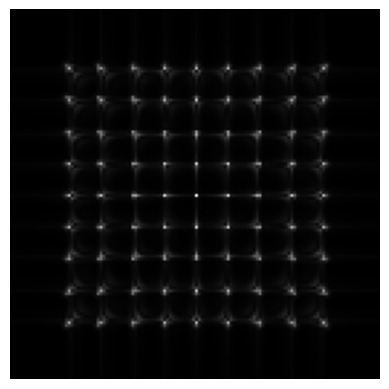

In [9]:
I = np.zeros((M,M))
#loop through u0 and v0 
for u0 in np.linspace(-0.7,(0.7),9):
    for v0 in np.linspace(-0.7,(0.7),9):
        #wavefront 
        W = seidel(u0,v0,-2*lam*fnum*Fu,-2*lam*fnum*Fv,coeffs)
        #coherent tarnsfer function
        H = circ(np.sqrt(Fu**2+Fv**2)*2*lam*fnum)*np.exp(-1j*k*W)
        #PSF
        psf = np.abs(ifftshift(ifft2(H)))**2
        #Shift to circular plane position
        psf = np.roll(psf,[int(np.round(u0*M/2)),int(np.round(v0*M/2))],axis=[1,0])
        #Add to frame
        I =I+psf
plt.figure(0)
plt.axis('off')
plt.imshow(np.sqrt(I),cmap='gray')



6
(128, 128)


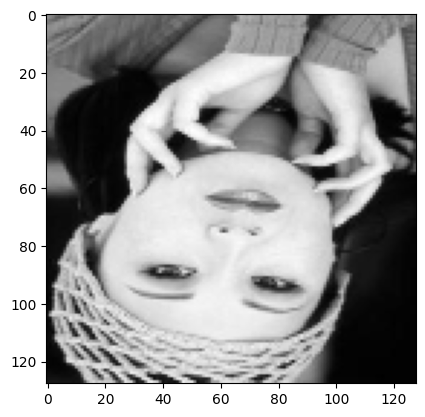

In [10]:
img = cv2.imread("woman.png",0)
img = cv2.resize(img,(128,128))
img = np.flipud(img)
#img = img[0:128,0:128]
Ig = img/np.max(img)
print(np.min(img))
print(img.shape)
plt.imshow(Ig,cmap='gray')

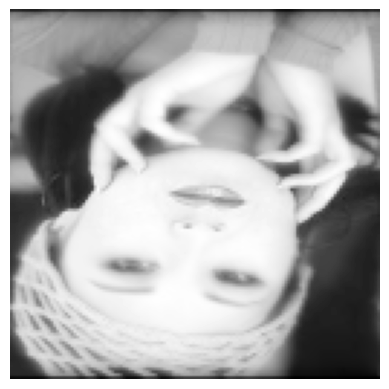

In [11]:



I = np.zeros((M,M))
#loop through u0 and v0 
for n in range(1,M+1):
    v0 = (n-(M/2+1))/(M/2)    # norm image coordinate
    for m in range(1,M+1):
        u0 = (n-(M/2+1))/(M/2) #norm image coordinate
        #wavefront 
        W = seidel(u0,v0,-2*lam*fnum*Fu,-2*lam*fnum*Fv,coeffs)
        #coherent tarnsfer function
        H = circ(np.sqrt(Fu**2+Fv**2)*2*lam*fnum)*np.exp(-1j*k*W)
        #PSF-Normalizsed to volume of 1
        psf = np.abs(ifftshift(ifft2(H)))**2
        psf = psf/np.sum(psf)

        #Shift to circular plane position
        psf = np.roll(psf,[int(m-(M/2+1)),int(n-(M/2+1))],axis=[1,0])
        #Add to frame
        I = I + Ig[n-1,m-1]*psf
plt.figure(0)
plt.axis('off')
plt.imshow(np.sqrt(I),cmap='gray')
